In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Task 1: Image Segmentation Using Thresholding (20 Marks) 

### (a) Load a grayscale image and implement the following thresholding methods to segment the image:
*  Binary Thresholding
*  Adaptive Thresholding
*  Otsu’s Thresholding

(10 Marks)

### (b) Display the original and segmented images side by side for comparison, ensuring each method is clearly labeled. (5 Marks)

### In 2-3 sentences, discuss which method provided the best segmentation for your image and why. Consider factors like clarity of object boundaries and noise levels. (5 Marks)

In [13]:
image = cv2.imread("../images/ein.jpeg")
grayScaled = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

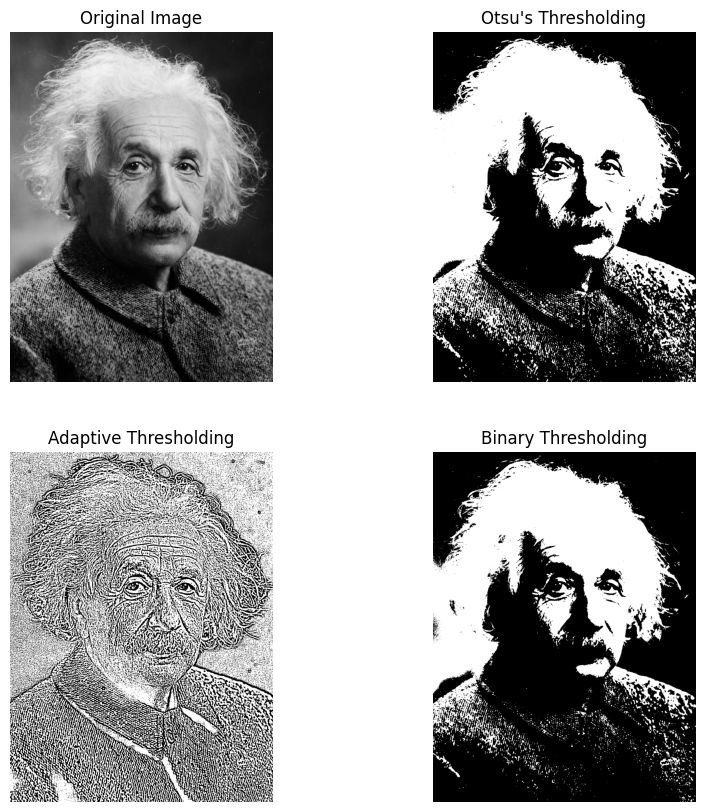

In [16]:
# Segmentation using Otsu's thresholding
_, binary = cv2.threshold(grayScaled, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# Segmentation using Adaptive thresholding
binaryAdaptive = cv2.adaptiveThreshold(grayScaled, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
# Signmentation using Binary Thresholding
_, binarySimple = cv2.threshold(grayScaled, 127, 255, cv2.THRESH_BINARY)

images = [image, binary, binaryAdaptive, binarySimple]
titles = ["Original Image", "Otsu's Thresholding", "Adaptive Thresholding", "Binary Thresholding"]
plt.figure("Thresholding", figsize=(10, 10))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(images[i], cmap="gray")
    plt.axis("off")
    plt.title(titles[i])

Binary Thresholding achieved the best results. Otsu's thresholding gave the second best results while adaptive thresholding performed poorly. The details on the clothes were quite similarly preserved by both Otsu's thresholding method and binary thresholding however, the part of background on left behind the hair was better preserved when using binary thresholding.

# Task 2: Line Detection Using Hough Transform (20 Marks)

### (a) Write a function to detect and highlight straight lines in an image using the Hough Line Transform. Make sure to use the Canny edge detector to preprocess the image before applying the Hough Transform. (10 Marks)
### (b) Test your function on an image with clear straight lines, such as a road, building, or grid structure. Display the original image and the processed image with highlighted lines. (5 Marks)
### (c) Experiment with different threshold parameters in the Hough Transform to optimize line detection. In 2-3 sentences, describe the parameter changes and how they affected the results. (5 Marks)

In [6]:
# Hough Transform for line detection with custom threshold
def detectLines(image, threshold = 200):
    edges = cv2.Canny(image, 50, 150, apertureSize=3)
    lines = cv2.HoughLines(edges, 1, np.pi / 180, threshold)
    for rho, theta in lines[:, 0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * a)
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * a)
        cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
    return image

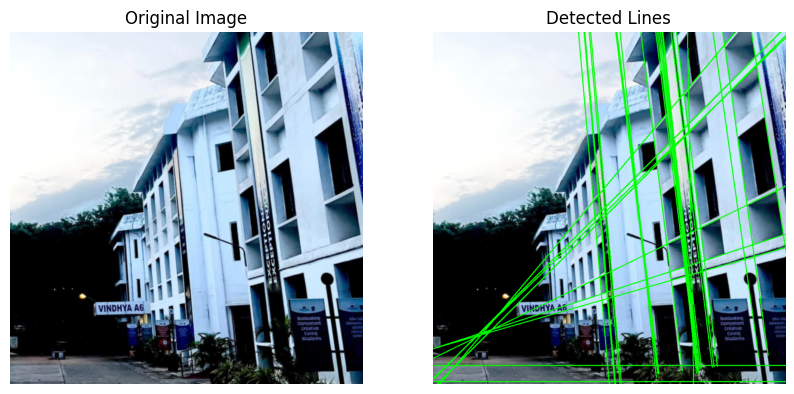

In [7]:
image = cv2.imread("../images/IMG3.jpeg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Blurring to remove noise
image = cv2.GaussianBlur(image, (5, 5), 1)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap="gray")
plt.axis("off")
plt.title("Original Image")
detectLines(image)
plt.subplot(1, 2, 2)
plt.imshow(image, cmap="gray")
plt.axis("off")
plt.title("Detected Lines")

plt.show()

It did detect lines but required a Gaussian Blur to remove noise first otherwise the some noise is also detected as line

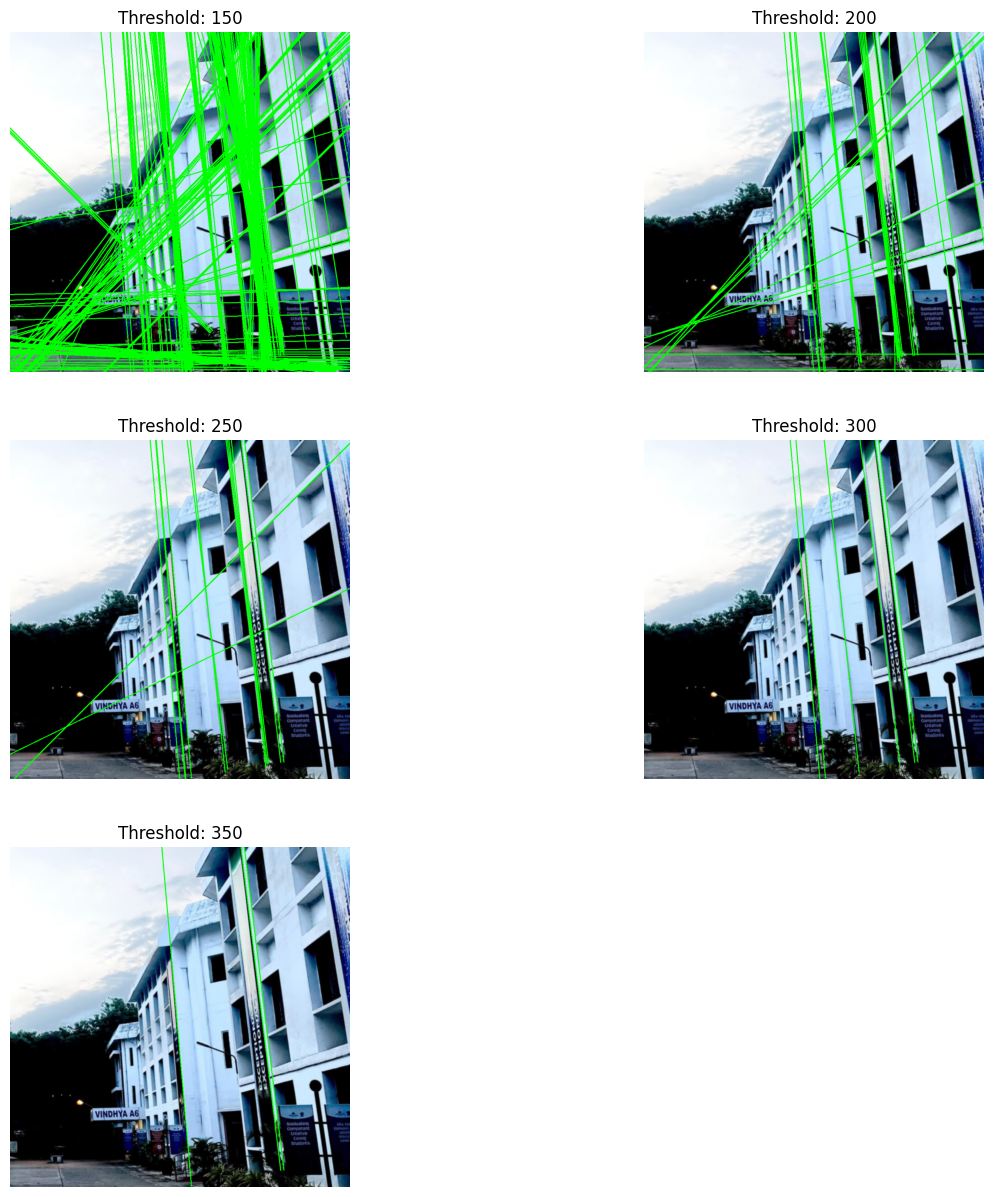

In [12]:
thresholds = [150, 200, 250, 300, 350]
# There will be 5 images with different thresholds
plt.figure(figsize=(15, 15))
for i in range(5):
    image = cv2.imread("../images/IMG3.jpeg")
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.GaussianBlur(image, (5, 5), 1)
    plt.subplot(3, 2, i + 1)
    plt.imshow(detectLines(image, thresholds[i]), cmap="gray")
    plt.axis("off")
    plt.title(f"Threshold: {thresholds[i]}")

Lessser edges detected with higher threshold. Higher threshold means longer lines are detected. Here threshold of 200 gave best results but missed some edges (these were small so detecting them would increase false detections)

# Task 3: Circle Detection Using Hough Circle Transform (20 Marks)

### (a) Implement a function to detect circles in an image using the Hough Circle Transform. Use suitable preprocessing steps (e.g., smoothing) to improve detection accuracy. (10 Marks)
### (b) Apply your function to an image with circular objects (e.g., coins, wheels, or round signs). Display the original image and the processed image with detected circles overlaid. (5 Marks)
### (c) Experiment with different radius ranges and accumulator thresholds. Display the results with and without these adjustments, and briefly explain any improvements observed. (5 Marks)

In [16]:
def detectCircleUsingHough(image, minRadius = 500, accumulatorThreshold = 50):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.GaussianBlur(image, (9, 9), 2)
    circles = cv2.HoughCircles(
        image, 
        cv2.HOUGH_GRADIENT, 
        dp = 1, 
        minDist = 20, 
        param1=100, 
        param2=accumulatorThreshold, # From opencv documentation, param2 is for accumulator threshold
        minRadius=minRadius,
        maxRadius=minRadius + 200 # Design choice, detecting circles with radius between minRadius and minRadius + 200
    )
    image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            cv2.circle(image, (i[0], i[1]), i[2], (0, 255, 0), 2)
    return image

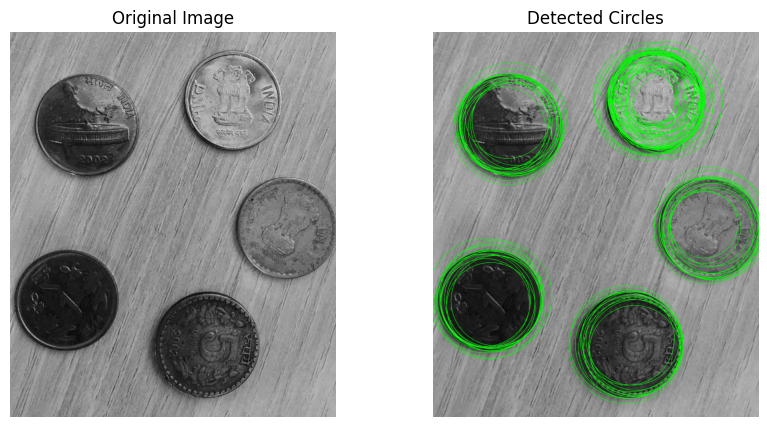

In [19]:
image = cv2.imread("../images/coin-detection.jpg")
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.axis("off")
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(detectCircleUsingHough(image, minRadius = 200), cmap="gray")
plt.axis("off")
plt.title("Detected Circles")
plt.show()

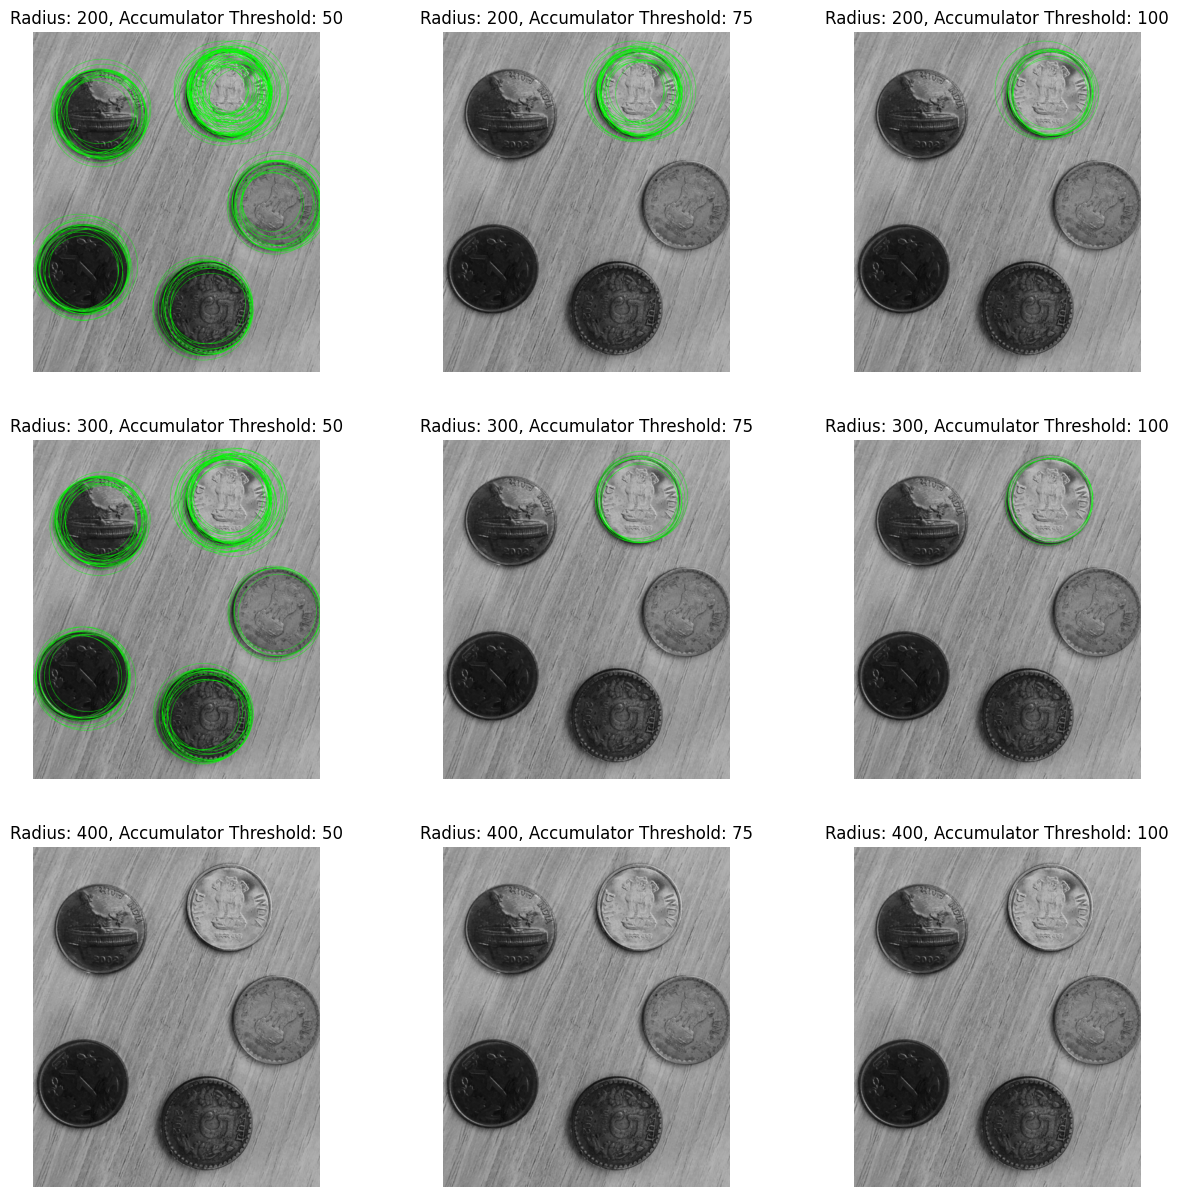

In [20]:
radii = [200, 300, 400]
accThresholds = [50, 75, 100]
# There will be 9 images with different radii and accumulator thresholds
plt.figure(figsize=(15, 15))
for i in range(3):
    for j in range(3):
        image = cv2.imread("../images/coin-detection.jpg")
        plt.subplot(3, 3, i * 3 + j + 1)
        plt.imshow(detectCircleUsingHough(image, radii[i], accThresholds[j]), cmap="gray")
        plt.axis("off")
        plt.title(f"Radius: {radii[i]}, Accumulator Threshold: {accThresholds[j]}")

### Effects of parameters (radius and accumulator thresholds):
- For smaller values of minRadius: Smaller circles were detected, resulting in more circles being detected (false detections as well, can be fixed by specifying a maxRadius as well).
- For smaller values of accumulator thresholds: The circles detected were closer. Resulting in more circles being detected (false detections as well).

Best parameters: radius = 300, accumulator threshold = 50 (all coins were detected and comparing to all other combinations, the false detections were minimum)

# Task 4: Harris Corner Detection (20 Marks)

### (a) Create a function to detect and mark corners in an image using the Harris Corner Detection method. Use an appropriate method to mark the detected corners on the original image. (10 Marks)
### (b) Apply your function to an image with distinct corners, such as a chessboard or a building with strong edges and corners. Display the original and processed images with corners marked. (5 Marks)
### (c) Vary the sensitivity parameter (typically called k) in the Harris Corner Detection function. Observe how it affects corner detection, showing both original and altered results. Briefly explain your findings in 2-3 sentences. (5 Marks)

In [7]:
def harrisCornerDetector(image, k):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)
    dst = cv2.cornerHarris(gray, 2, 3, 0.04)
    dst = cv2.dilate(dst, None)
    image[dst > k * dst.max()] = [0, 0, 255]
    return image

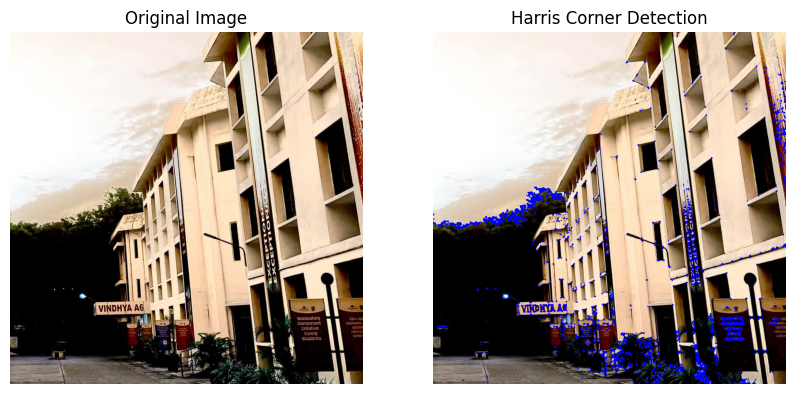

In [8]:
image = cv2.imread("../images/IMG3.jpeg")
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.axis("off")
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(harrisCornerDetector(image, 0.01))
plt.axis("off")
plt.title("Harris Corner Detection")
plt.show()


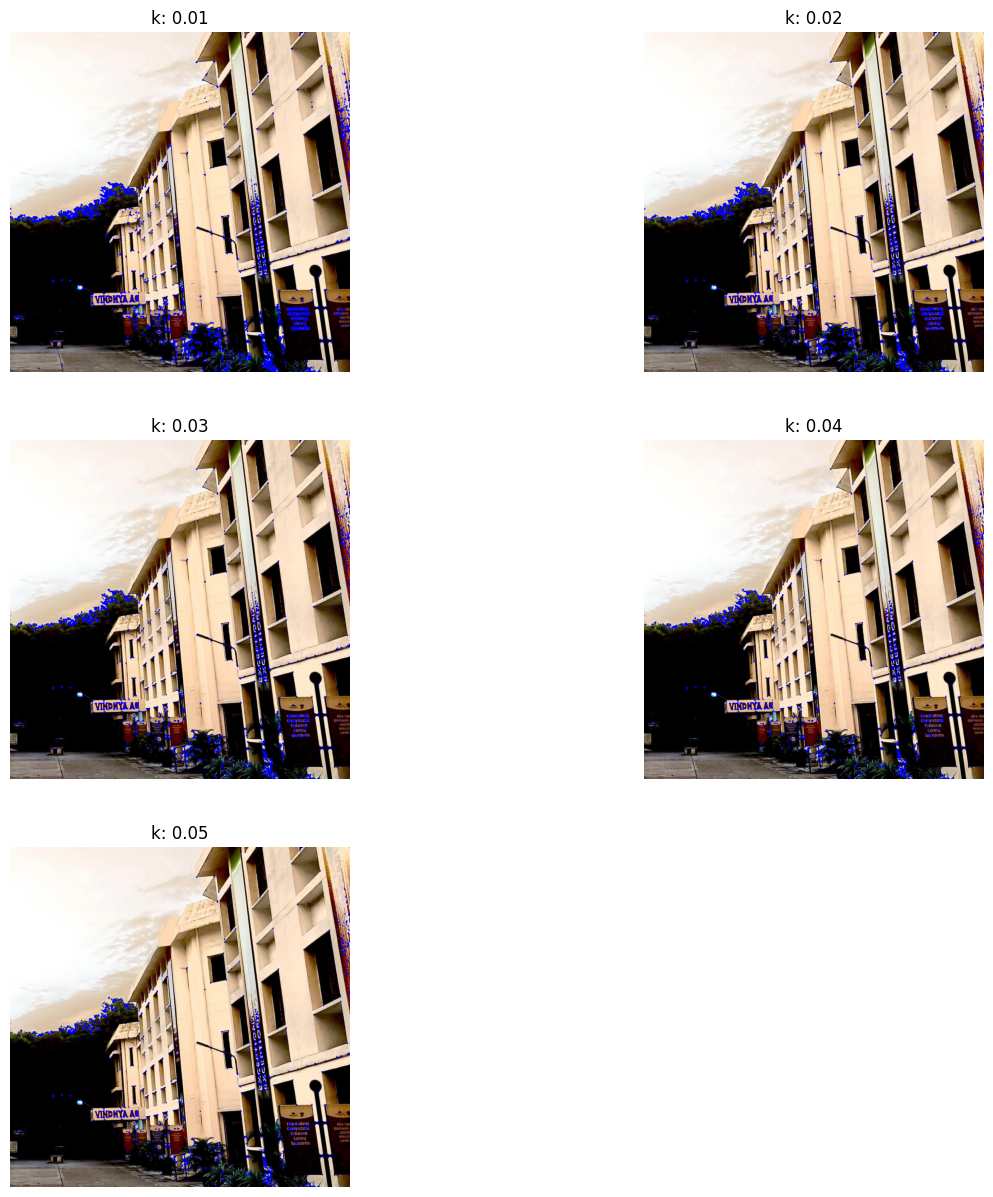

In [9]:
k = [0.01, 0.02, 0.03, 0.04, 0.05]
# There will be 5 images with different k values
plt.figure(figsize=(15, 15))
for i in range(5):
    image = cv2.imread("../images/IMG3.jpeg")
    plt.subplot(3, 2, i + 1)
    plt.imshow(harrisCornerDetector(image, k[i]))
    plt.axis("off")
    plt.title(f"k: {k[i]}")

#### Observations:
As value of k increases, lesser corners were detected reducing the number of actual corners detected and also reducing the false detections. A blurring filter could be used but that would blur out the actual corners as well.

# Task 5: Short Theory (10 Marks)

### In 100-150 words, explain how the Hough Transform differs when detecting lines versus circles in an image. Discuss how parameter space and computational complexity vary between these applications. (10 Marks)

* Hough Transform detects shapes (lines and circles here) by mapping image space (x, y) to parameter space.
* For line detection, each point (x, y) in the image is mapped to a sinusoidal curve in the parameter space (rho, theta) (rho -> Line's distance from origin and theta -> angle)
* For circle detection, each point (x, y) in the image is mapped to a 3D parameters (xc, yc, r) (xc, yc -> center coordinates for the circle and r -> radius of the circle)
* Detecting lines is less computationally expensive as compared to detecting circles because for line detection the parameter space is 2D but for circle detection, the parameter space is 3D. 
* The computation cost for circle detection can be reduced by restricting the radius ranges for detection for circles (i.e., minimizing the difference between minRadius and maxRadius)